<a href="https://colab.research.google.com/github/sabo96/K-MeansImplementationFromScratch/blob/main/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *K-Means Clustering*

# **Task 1 - Preparing Datasets and Practical Application**

### Selecting Small Dataset

In [1]:
# importing relevant packaged
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.datasets import load_iris

In [2]:
small_dataset = pd.DataFrame()
small_dataset['X'] = [1, 6, 2, -1, 5, -2]
small_dataset['Y'] = [2, 8, 4, -3, 7, 4]

I am confident that the small dataset I have chosen for practical k-means clustering is suitable for
2 reasons:
- it is entirely numerical in nature, which is a necessary feature for k-means clustering, as we
cannot work with non-numerical values such as categorical data
- the data points are of a similar scale and do not have a wide range - datasets with wider
ranges are inappropriate for k-means clustering
- there is an obvious clustering of points which allows for straightforward sanity checks later

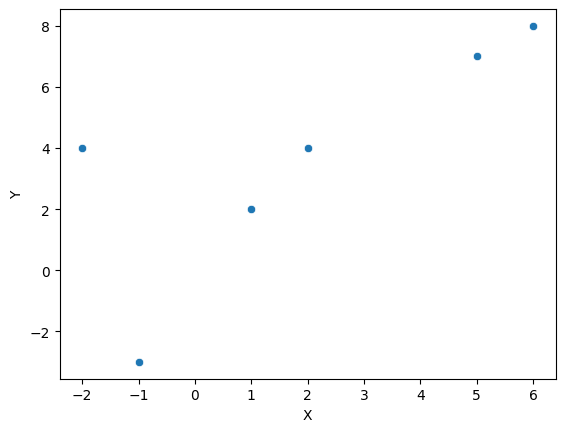

In [3]:
sns.scatterplot(x="X", y="Y", data=small_dataset)
plt.show()

### Practical Application and Sanity Checks

We can apply a practical application of K-means clustering on paper using the Euclidean distance to classify points and calculate centroids and clusters until the maximum number of iterations is reached (and the clusters do not change). As a student project, this was calculated on paper outside of this notebook.

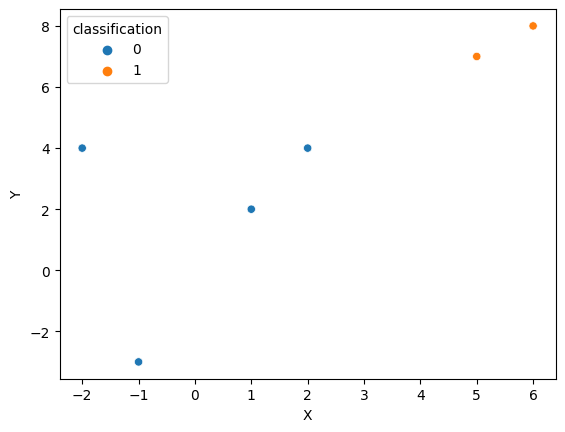

In [4]:
small_dataset['classification'] = [0, 1, 0, 0, 1, 0] # classifications based on practical calculations on paper
sns.scatterplot(x="X", y="Y", data=small_dataset, hue="classification")
plt.show()

We can tell that the practical application has been successful. By visually examining the plot, we
can see that the two clusters are separated in a logical manner and thus, the classification makes
sense - we can say that the practical algorithm we have used has passed sanity checking in this
case.

### Selecting Large Dataset

For my large dataset, I have chosen to use the first 2 features of the Iris dataset; sepal length and sepal width (in cm).

In [5]:
iris1 = load_iris()
iris = pd.DataFrame(iris1['data'], columns=iris1['feature_names'])
iris2d = iris[['sepal length (cm)','sepal width (cm)']].to_numpy()

In [6]:
iris2d[:5] # printing first 5 values of sepal length and width

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6]])

# **Task 2:  Creating a Test Harness**

We can compare the outputs of our implementation to a reference implementation, which in this case will be the KMeans module from sklearn.

In [54]:
from sklearn.cluster import KMeans
sk_kmeans = KMeans(n_clusters=3, n_init=10)
sk_kmeans.fit(iris2d)
label = sk_kmeans.fit_predict(iris2d)

In [55]:
sk_labels = np.sort(sk_kmeans.labels_)
print('The predicted labels using the sklearn implentation are', sk_labels)
print('The final calculated centroids for k=3 clusters using the sklearn implementation on the iris dataset is', sk_kmeans.cluster_centers_)

The predicted labels using the sklearn implentation are [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
The final calculated centroids for k=3 clusters using the sklearn implementation on the iris dataset is [[6.81276596 3.07446809]
 [5.77358491 2.69245283]
 [5.006      3.428     ]]


Using the sklearn kmeans implementation, we can see the predicted labels for each point and the cluster centres. If our implementation has worked correctly, we can assume that these cluster centres will be the same when we print them in our output. Furthermore, we can expect to see a similar clustering when we visualise our output from our own K-means clustering algorithm below.



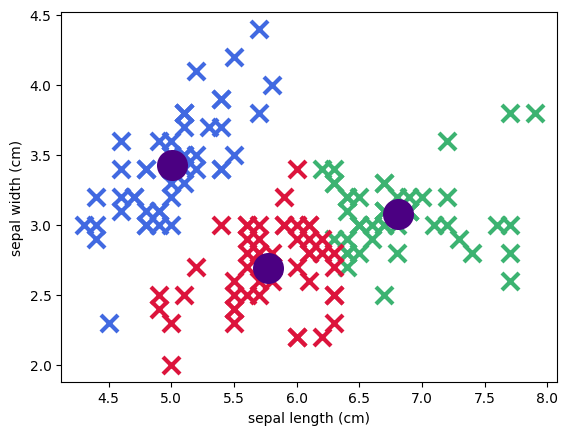

In [56]:
final_centroids = sk_kmeans.cluster_centers_
test_label0 = iris2d[label == 0]
test_label1 = iris2d[label == 1]
test_label2 = iris2d[label == 2]
plt.scatter(test_label0[:,0] , test_label0[:,1] , color = 'mediumseagreen', marker='x', s=150, linewidths=3)
plt.scatter(test_label1[:,0] , test_label1[:,1] , color = 'crimson', marker='x', s=150, linewidths=3)
plt.scatter(test_label2[:,0] , test_label2[:,1] , color = 'royalblue', marker='x', s=150, linewidths=3)
plt.scatter(final_centroids[:,0], final_centroids[:,1], marker='o', linewidths=5, color = 'indigo', s = 300)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()


disclaimer: re-run the model until the colours of the clusters match the kmeans implementation below (blue, red, green from left to right)

# **Task 3: Python Implementation from Scratch**

### K-Means Implementation

In [10]:
# defining set of functions as a class 'K_means'
class K_Means:
    # initialising attributes of the class KMeans
    def __init__(self, k=3, max_iterations=200, tolerance=0.0001):
        # k is manually set to 3 here
        self.k = k
        # sets maximum number of iterations at 200, but unlikely to take more than 10-50 iterations
        self.max_iterations = max_iterations
        # the tolerance is the difference between the sum of squared errors of 2 successive iterations - set as 0.0001
        self.tolerance = tolerance

    # defining fit function for K-Means clustering
    def fit(self, data):
        self.centroids = {}
        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iterations):
            # sets up an empty dictionary for clusters
            self.clusters = {}
            for i in range(self.k):
                self.clusters[i] = []

            labels_list = []

            for labels in data:
                # calculates the Euclidean distance between each point and each centroid, assigns classification using the minimum distance calculated
                euclidean_distance = [np.linalg.norm(labels - self.centroids[centroid]) for centroid in self.centroids] # numpy linalg.norm calculates L2 norm as the Euclidean distance
                classification = euclidean_distance.index(min(euclidean_distance))
                # updates classification for each point
                labels_list.append(classification)
                self.clusters[classification].append(labels)

            self.labels = labels_list
            # saves the centroids used in this iteration as a dictionary
            oldcentroids = dict(self.centroids)

            # updates new centroids using the average of data points in each new cluster
            for classification in self.clusters:
                self.centroids[classification] = np.average(self.clusters[classification], axis=0)

            optimized = True
            # sets cutoff if the percentage change in distance between old and new centroid is greater than tolerance
            for c in self.centroids:
                previouscentroid = oldcentroids[c]
                currentcentroid = self.centroids[c]
                zero_indices = np.where(np.isclose(previouscentroid, 0))
                if len(zero_indices[0]) == 0:
                  percentage_change = np.sum((currentcentroid - previouscentroid) / previouscentroid * 100.0)
                  if percentage_change > self.tolerance:
                    optimized = False

                #if np.sum((currentcentroid - previouscentroid) / previouscentroid * 100.0) > self.tolerance:
                    #optimized = False

            # ends the process if all points have been classified to a cluster containing the closest centroid
            if optimized:
                break

    def get_centroids(self):
        return [self.centroids[key] for key in self.centroids.keys()]

In [16]:
kmeans = K_Means() # initialise
kmeans.fit(iris2d) # fit model

In [17]:
k_labels = np.sort(np.array(kmeans.labels))
print('The predicted labels using my K-means implentation are', k_labels)
print('The final calculated centroids for k=3 clusters using my K-means clustering implementation on my large dataset are', kmeans.get_centroids())

The predicted labels using my K-means implentation are [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
The final calculated centroids for k=3 clusters using my K-means clustering implementation on my large dataset are [array([6.81276596, 3.07446809]), array([5.77358491, 2.69245283]), array([5.006, 3.428])]


### Runtime and Time Complexity

In [18]:
from timeit import default_timer as timer

In [19]:
smol = small_dataset.to_numpy()

a1 = timer()
kmeans2 = K_Means()
kmeans2.fit(smol)
b1 = timer()
time_taken2 = b1-a1
print("The time taken for my k-means algorithm to run using my small dataset is %.6f"% time_taken2)

The time taken for my k-means algorithm to run using my small dataset is 0.004122


In [20]:
a = timer()
kmeans2 = K_Means()
kmeans2.fit(iris2d)
b = timer()
time_taken = b-a
time_taken = round(time_taken, 10)
print("The time taken for my k-means algorithm to run using the larger Iris dataset is %.6f"% time_taken)

The time taken for my k-means algorithm to run using the larger Iris dataset is 0.041198


From this rudimentary, primal evaluation, we can see of course that running the model with the smaller dataset is always faster. However, while we can compute the run time manually, running time depends on multiple factors. It makes much more sense to calculate our runtime as a function of inputs and clusters using time complexity. We can calculate the time complexity of our algorithm using Lloyd's algorithm:

$time$ $complexity$ = $nki$, where:

$n$ = length of data

$k$ = number of clusters

$i$ = number of iterations


We can calculate the maximum time complexity using the maximum number of iterations, which was set to 200.

In [21]:
def timecomplexity(k, data):
  n = len(data)
  timecomplexity = n*k*200
  return timecomplexity

In [22]:
print("The time complexity for my small dataset is", timecomplexity(2, smol))

The time complexity for my small dataset is 2400


In [23]:
print("The time complexity for my large dataset is", timecomplexity(3, iris2d))

The time complexity for my large dataset is 90000


# **Task 4: Visualisation and Evaluation**

### Data Visualisation

To further understand our implementation, we can also code functions which visualise our data in a scatter plot and colour-codes the clusters accordingly. This plot can be compared to the plot we retrieved earlier using the sklearn module. We can also visualise the k-centroids used to determine the classifications within the clusters.

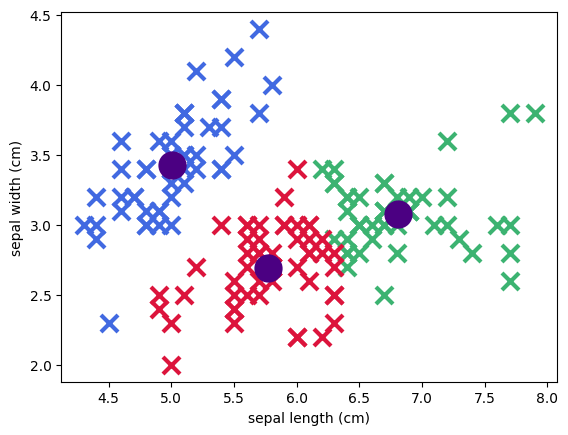

In [24]:
colors = ['mediumseagreen', 'crimson', 'royalblue', 'firebrick', 'black']

for classification in kmeans.clusters:
    color = colors[classification]
    for labels in kmeans.clusters[classification]:
        plt.scatter(labels[0], labels[1], marker='x', color=color, s=150, linewidths=3)

for centroid in kmeans.centroids:
    plt.scatter(kmeans.centroids[centroid][0], kmeans.centroids[centroid][1], marker='o', color='indigo', s=300, linewidths=3)

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()


The plot shows we have 3 distinct clusters with appropriately placed cluster centres. The data points are colour-coded for easier visualisation with the x and y axes labelled according to the features of our large dataset. Additionally, the plot is identical to the plot we obtained from the sklearn implementation and as such, we can assume that both our implementation and the
visualisation is working correctly.

### Evaluation

Remember - the sklearns implementation assigns the initial labels randomly - this is why we need to ensure the colours of the clusters in the maps are the same colour by rerunning the sklearn model multiple times to ensure the evaluation is accurate/representative.

In [57]:
def accuracy(reference_data, model_data):
  correct = 0
  for i in range(len(reference_data)):
    if reference_data[i] == model_data[i]:
      correct += 1
  return correct / float(len(reference_data)) * 100.00

In [58]:
print("The accuracy of my k-means clustering algorithm compared to the sklearn module is %2.f"% accuracy(sk_labels, k_labels),"%")

The accuracy of my k-means clustering algorithm compared to the sklearn module is 100 %
